# Capítulo 13: Redes Neuronales Recurrentes

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, SimpleRNN

unidades = 10
pasos = 3
entrada=2
model = Sequential()
model.add(Input(shape=(pasos, entrada)))
model.add(SimpleRNN(unidades))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130 (520.00 B)

 Trainable params: 130 (520.00 B)

 Non-trainable params: 0 (0.00 B)

## <b>Modelado del lenguaje con una RNN SIMPLE</b>

In [94]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 9

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from keras.optimizers import Adam

texto = """Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. 
Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos.
El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarlas con el dedo."""

In [96]:
# Tokenización
tokenizador = Tokenizer()
tokenizador.fit_on_texts([texto])
tam_vocab = len(tokenizador.word_index) + 1

In [97]:
tokenizador.word_index

{'de': 1,
 'el': 2,
 'que': 3,
 'y': 4,
 'había': 5,
 'a': 6,
 'era': 7,
 'un': 8,
 'muchos': 9,
 'años': 10,
 'después': 11,
 'frente': 12,
 'al': 13,
 'pelotón': 14,
 'fusilamiento': 15,
 'coronel': 16,
 'aureliano': 17,
 'buendía': 18,
 'recordar': 19,
 'aquella': 20,
 'tarde': 21,
 'remota': 22,
 'en': 23,
 'su': 24,
 'padre': 25,
 'lo': 26,
 'llevó': 27,
 'conocer': 28,
 'hielo': 29,
 'macondo': 30,
 'entonces': 31,
 'una': 32,
 'aldea': 33,
 'veinte': 34,
 'casas': 35,
 'barro': 36,
 'cañabrava': 37,
 'construidas': 38,
 'la': 39,
 'orilla': 40,
 'río': 41,
 'aguas': 42,
 'diáfanas': 43,
 'se': 44,
 'precipitaban': 45,
 'por': 46,
 'lecho': 47,
 'piedras': 48,
 'pulidas': 49,
 'blancas': 50,
 'enormes': 51,
 'como': 52,
 'huevos': 53,
 'prehistóricos': 54,
 'mundo': 55,
 'tan': 56,
 'reciente': 57,
 'muchas': 58,
 'cosas': 59,
 'carecían': 60,
 'nombre': 61,
 'para': 62,
 'mencionarlas': 63,
 'señalarlas': 64,
 'con': 65,
 'dedo': 66}

In [98]:
tokenizador.texts_to_sequences(["el coronel Aureliano"])[0]

[2, 16, 17]

In [99]:
# Convertir el texto en secuencias de enteros
secuencias = []
for linea in texto.split('.'):
    lista_tokens = tokenizador.texts_to_sequences([linea])[0]
    for i in range(1, len(lista_tokens)):
        secuencia_ngramas = lista_tokens[:i+1]
        secuencias.append(secuencia_ngramas)

In [100]:
secuencias[:3]

[[9, 10], [9, 10, 11], [9, 10, 11, 12]]

In [101]:
# Padding de las secuencias
long_max_secuencia = max([len(x) for x in secuencias])
secuencias = np.array(pad_sequences(secuencias, maxlen=long_max_secuencia, padding='pre'))

In [102]:
secuencias

array([[ 0,  0,  0, ...,  0,  9, 10],
       [ 0,  0,  0, ...,  9, 10, 11],
       [ 0,  0,  0, ..., 10, 11, 12],
       ...,
       [ 0,  0,  0, ...,  3, 64, 65],
       [ 0,  0,  0, ..., 64, 65,  2],
       [ 0,  0,  0, ..., 65,  2, 66]])

In [103]:
# Crear X e y
X = secuencias[:,:-1]
y = secuencias[:,-1]
y = to_categorical(y, num_classes=tam_vocab)

In [104]:
modelo = Sequential()
modelo.add(Embedding(tam_vocab, 50, input_length=long_max_secuencia-1))
modelo.add(SimpleRNN(100))
modelo.add(Dense(tam_vocab, activation='softmax'))
modelo.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
modelo.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
historico = modelo.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0200 - loss: 4.2348  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0456 - loss: 4.2508
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1096 - loss: 4.2095 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0813 - loss: 4.1597
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1113 - loss: 3.8951 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0917 - loss: 3.7359 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1483 - loss: 3.5909 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1601 - loss: 3.5072
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2026 - loss: 3.6141
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0556 - loss: 3.9460
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0696 - loss: 4.1012
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2465 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0092 
Epoch 70/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0090 
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0089 
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0088
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0081 
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0083 
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0080 
Epoch 76/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0078 
Epoch 77/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0075 
Epoch 78/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 79/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0074
Epoch 80/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 

In [111]:
def generar_texto(texto, num_palabras):
    for _ in range(num_palabras):
        # Pre-procesamiento de la entrada
        texto_proc = tokenizador.texts_to_sequences([texto])[0]
        texto_proc = pad_sequences([texto_proc], maxlen=long_max_secuencia-1, padding='pre')

        # Prediccion de la siguiente palabra
        predict = modelo.predict(texto_proc, verbose=0)
        predicted = np.argmax(predict, axis=1)

        # Concatenamos al texto de entrada la palabra generada 
        siguiente_palabra = ""
        for palabra,index in tokenizador.word_index.items():
            if index == predicted:
                siguiente_palabra = palabra
                break
        texto += " " + siguiente_palabra
    return texto.title()

In [113]:
generar_texto("El coronel Aureliano", 5)

'El Coronel Aureliano Frente Al Pelotón De Fusilamiento'

## <b>Predicción del sentimiento mediante una LSTM</b>

In [114]:
from keras.datasets import imdb

tam_vocab = 10000  # Limitar el vocabulario a las 10,000 palabras más comunes
long_max = 100   # limitar el tamaño de las secuencias
conj_entrenamiento, conj_prueba = imdb.load_data(num_words=tam_vocab)
X_train, y_train = conj_entrenamiento
X_test, y_test = conj_prueba

In [115]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [124]:
palabra_a_id = imdb.get_word_index()
palabra_a_id

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [125]:
palabra_a_id = {clave:(valor+3) for clave,valor in palabra_a_id.items()}
palabra_a_id["<PAD>"] = 0
palabra_a_id["<START>"] = 1
palabra_a_id["<UNK>"] = 2
palabra_a_id["<UNUSED>"] = 3
ind_palabra = {valor:clave for clave,valor in palabra_a_id.items()}

In [ ]:
X_train[9]

In [126]:
print(' '.join(ind_palabra[id] for id in X_train[9] ))

<START> this movie has many problem associated with it that makes it come off like a low budget class project from someone in film school i have to give it credit on its <UNK> though many times throughout the movie i found myself laughing hysterically it was so bad at times that it was comical which made it a fun watch br br if you're looking for a low grade slasher movie with a twist of psychological horror and a dash of campy <UNK> then pop a bowl of popcorn invite some friends over and have some fun br br i agree with other comments that the sound is very bad dialog is next to impossible to follow much of the time and the soundtrack is kind of just there


In [127]:
print("Etiqueta:", y_train[9])

Etiqueta: 0


In [128]:
print(' '.join(ind_palabra[id] for id in X_train[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [129]:
print("Etiqueta:", y_train[0])

Etiqueta: 1


In [130]:
from keras.preprocessing import sequence
X_train_padded = sequence.pad_sequences(X_train, maxlen= long_max)
X_test_padded = sequence.pad_sequences(X_test, maxlen= long_max)
print("Forma de X_train: {}".format(X_train_padded.shape))
print("Forma de X_test: {}".format(X_test_padded.shape))

Forma de X_train: (25000, 100)
Forma de X_test: (25000, 100)


In [131]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(Embedding(input_dim = tam_vocab, output_dim = 128, input_length=long_max))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [133]:
historico = model.fit(x=X_train_padded, y=y_train,
                   batch_size = 128, epochs=10, 
                   validation_data=(X_test_padded, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 299ms/step - accuracy: 0.7146 - loss: 0.5373 - val_accuracy: 0.8515 - val_loss: 0.3464
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 334ms/step - accuracy: 0.8936 - loss: 0.2647 - val_accuracy: 0.8496 - val_loss: 0.3469
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 73s 370ms/step - accuracy: 0.9249 - loss: 0.2003 - val_accuracy: 0.8386 - val_loss: 0.3883
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 390ms/step - accuracy: 0.9498 - loss: 0.1423 - val_accuracy: 0.8364 - val_loss: 0.4443
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 75s 382ms/step - accuracy: 0.9659 - loss: 0.1053 - val_accuracy: 0.8326 - val_loss: 0.4928
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 355ms/step - accuracy: 0.9739 - loss: 0.0778 - val_accuracy: 0.8234 - val_loss: 0.5983
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 68s 347ms/step - accuracy: 0.9819 - loss: 0.0566 - val_accuracy: 0.8251 - val_loss: 0.7576
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 340ms/step - accuracy: 0.9816 - loss: 0

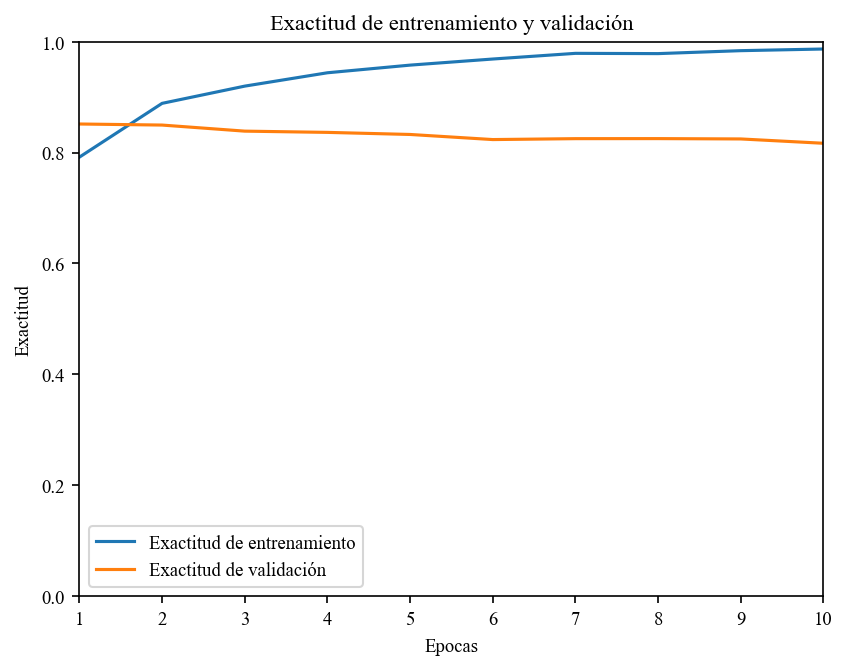

In [134]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), historico.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(range(1,11), historico.history['val_accuracy'], 
         label='Exactitud de validación')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epocas')
plt.ylabel('Exactitud')
plt.title('Exactitud de entrenamiento y validación')
plt.legend()
plt.show()

In [135]:
texto_neg = X_test[9]
texto_pos = X_test[13]
textos = (texto_neg, texto_pos)
textos = pad_sequences(textos, maxlen=100, value = 0.0) 
preds = model.predict(textos)
print("Predicción Ejemplo 1:" , preds[0])
print("Sentimiento Ejemplo 1:", "Positivo" if preds[0] >= 0.5 else "Negativo")
print("Predicción Ejemplo 2:" , preds[1])
print("Sentimiento Ejemplo 2:", "Positivo" if preds[1] >= 0.5 else "Negativo")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicción Ejemplo 1: [0.99966604]
Sentimiento Ejemplo 1: Positivo
Predicción Ejemplo 2: [0.00069009]
Sentimiento Ejemplo 2: Negativo


In [136]:
puntajes = model.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[1]))

Exactitud: 0.82


## <b>Clasificador de sentimientos mediante GRU</b>

In [137]:
from tensorflow.keras.layers import GRU, Dropout

In [138]:
modelo_gru = Sequential() 
modelo_gru.add(Embedding(input_dim = tam_vocab, input_length=long_max, output_dim=128))
modelo_gru.add(GRU(128))
modelo_gru.add(Dense(1, activation='sigmoid'))

modelo_gru.summary()
modelo_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [139]:
historico_gru = modelo_gru.fit(X_train_padded, y_train, batch_size=128, validation_data=(X_test_padded, y_test), epochs = 10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 97s 402ms/step - accuracy: 0.6766 - loss: 0.5590 - val_accuracy: 0.8458 - val_loss: 0.3512
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.8916 - loss: 0.2658 - val_accuracy: 0.8399 - val_loss: 0.3672
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.9219 - loss: 0.2047 - val_accuracy: 0.8414 - val_loss: 0.3657
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 418ms/step - accuracy: 0.9491 - loss: 0.1448 - val_accuracy: 0.8380 - val_loss: 0.4315
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 356ms/step - accuracy: 0.9642 - loss: 0.1061 - val_accuracy: 0.8336 - val_loss: 0.5260
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 64s 328ms/step - accuracy: 0.9781 - loss: 0.0664 - val_accuracy: 0.8292 - val_loss: 0.6281
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 350ms/step - accuracy: 0.9834 - loss: 0.0533 - val_accuracy: 0.8288 - val_loss: 0.6314
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 71s 361ms/step - accuracy: 0.9894 - loss: 0

In [140]:
puntajes = modelo_gru.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[0]))

Exactitud: 0.87


## <b>Prueba con RNN Bidireccional</b>

In [135]:
from tensorflow.keras.layers import Bidirectional

In [160]:
modelo_bidireccional = Sequential() 
modelo_bidireccional.add(Embedding(input_dim = tam_vocab, input_length=long_max, output_dim=128)) 
modelo_bidireccional.add(Bidirectional(LSTM(128)))
modelo_bidireccional.add(Dense(1, activation='sigmoid'))

In [161]:
modelo_bidireccional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelo_bidireccional.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [162]:
historico = modelo_bidireccional.fit(X_train_padded, y_train, batch_size=128, validation_data=(X_test_padded, y_test), epochs = 10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 107s 499ms/step - accuracy: 0.7122 - loss: 0.5344 - val_accuracy: 0.8456 - val_loss: 0.3532
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 109s 554ms/step - accuracy: 0.8945 - loss: 0.2653 - val_accuracy: 0.8479 - val_loss: 0.3527
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 115s 587ms/step - accuracy: 0.9272 - loss: 0.1935 - val_accuracy: 0.8450 - val_loss: 0.3826
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 110s 565ms/step - accuracy: 0.9465 - loss: 0.1466 - val_accuracy: 0.8394 - val_loss: 0.4332
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.9640 - loss: 0.1017 - val_accuracy: 0.8262 - val_loss: 0.6006
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 116s 593ms/step - accuracy: 0.9790 - loss: 0.0635 - val_accuracy: 0.8276 - val_loss: 0.6671
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 110s 564ms/step - accuracy: 0.9832 - loss: 0.0514 - val_accuracy: 0.8247 - val_loss: 0.7263
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 600ms/step - accuracy: 0.9920 -

In [163]:
puntajes = modelo_bidireccional.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[0]))

Exactitud: 0.93


## <b>Prueba con RNN de capas apiladas</b>

In [27]:
modelo_apilado = Sequential() 
modelo_apilado.add(Embedding(input_dim = tam_vocab, input_length=long_max, output_dim=128)) 
modelo_apilado.add(LSTM(128, return_sequences=True))
modelo_apilado.add(Dropout(0.1))
modelo_apilado.add(GRU(64))
modelo_apilado.add(Dropout(0.1))
modelo_apilado.add(Dense(1, activation='sigmoid')) 
modelo_apilado.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelo_apilado.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
historico = modelo_apilado.fit(X_train_padded, y_train, batch_size=128, validation_data=(X_test_padded, y_test), epochs = 10)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 153s 718ms/step - accuracy: 0.6844 - loss: 0.5767 - val_accuracy: 0.8482 - val_loss: 0.3485
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 707ms/step - accuracy: 0.8936 - loss: 0.2709 - val_accuracy: 0.8494 - val_loss: 0.3433
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 719ms/step - accuracy: 0.9277 - loss: 0.1952 - val_accuracy: 0.8426 - val_loss: 0.3676
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 727ms/step - accuracy: 0.9474 - loss: 0.1468 - val_accuracy: 0.8351 - val_loss: 0.4215
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 732ms/step - accuracy: 0.9632 - loss: 0.1029 - val_accuracy: 0.8250 - val_loss: 0.5410
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 123s 629ms/step - accuracy: 0.9713 - loss: 0.0815 - val_accuracy: 0.8222 - val_loss: 0.5211
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 121s 619ms/step - accuracy: 0.9803 - loss: 0.0594 - val_accuracy: 0.8241 - val_loss: 0.8244
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 749ms/step - accuracy: 0.9883 -

In [30]:
puntajes = modelo_apilado.evaluate(X_test_padded, y_test, verbose=0)
print('Exactitud: {:.2f}'.format(puntajes[1]))

Exactitud: 0.82
